In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
dataset=pd.read_csv('Social_Network_Ads.csv')

In [31]:
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler=StandardScaler()

In [34]:
dataset['Gender'].replace('Female',0,inplace=True)
dataset['Gender'].replace('Male',1,inplace=True)

In [35]:
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [36]:
scaled_features=scaler.fit(dataset.drop('Purchased',axis=1))

In [37]:
scaled_features=scaler.transform(dataset.drop('Purchased',axis=1))

In [38]:
scaled_features

array([[-0.93657932,  1.02020406, -1.78179743, -1.49004624],
       [ 1.66838653,  1.02020406, -0.25358736, -1.46068138],
       [-0.32087714, -0.98019606, -1.11320552, -0.78528968],
       ...,
       [-0.52039175, -0.98019606,  1.17910958, -1.46068138],
       [ 0.88695546,  1.02020406, -0.15807423, -1.07893824],
       [-1.36231017, -0.98019606,  1.08359645, -0.99084367]])

In [40]:
new_dataset=pd.DataFrame(scaled_features)

In [41]:
new_dataset

,0,1,2,3
0,-0.936579,1.020204,-1.781797,-1.490046
1,1.668387,1.020204,-0.253587,-1.460681
2,-0.320877,-0.980196,-1.113206,-0.785290
3,-1.233692,-0.980196,-1.017692,-0.374182
4,1.571389,1.020204,-1.781797,0.183751
...,...,...,...,...
395,0.004517,-0.980196,0.797057,-0.844019
396,0.203039,1.020204,1.274623,-1.372587
397,-0.520392,-0.980196,1.179110,-1.460681
398,0.886955,1.020204,-0.158074,-1.078938


In [42]:
from sklearn.model_selection import train_test_split
X=new_dataset
y=dataset['Purchased']

In [43]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
knn=KNeighborsClassifier(n_neighbors=1)

In [48]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [51]:
pred=knn.predict(X_test)

In [52]:
from sklearn.metrics import classification_report,confusion_matrix

In [53]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[71  2]
 [10 37]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        73
           1       0.95      0.79      0.86        47

    accuracy                           0.90       120
   macro avg       0.91      0.88      0.89       120
weighted avg       0.90      0.90      0.90       120



In [54]:
error_rate=[]

for i in range(1,40):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i=knn.predict(X_test)
  error_rate.append(np.mean(pred_i !=y_test))

Text(0, 0.5, 'Error rate')

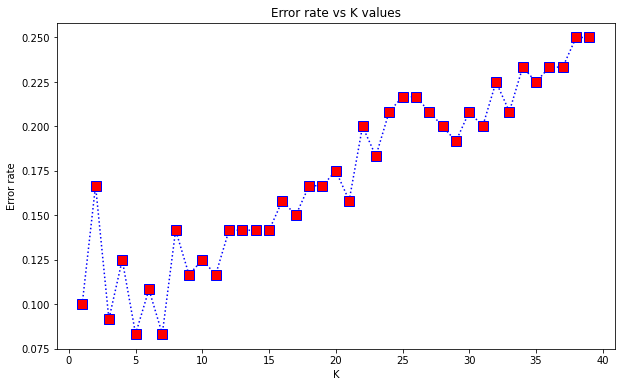

In [56]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dotted',
         marker='s',markerfacecolor='red',markersize=10)
plt.title('Error rate vs K values')
plt.xlabel('K')
plt.ylabel('Error rate')

In [57]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))


[[70  3]
 [ 7 40]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93        73
           1       0.93      0.85      0.89        47

    accuracy                           0.92       120
   macro avg       0.92      0.90      0.91       120
weighted avg       0.92      0.92      0.92       120

